In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print ("We are ready to Go")

We are ready to Go


In [2]:
netflix =pd.read_csv("netflix_titles.csv")

In [4]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
netflix.shape

(8807, 12)

In [7]:
print ('Check if any duplicate values are avaliable:', netflix.duplicated().sum())

Check if any duplicate values are avaliable: 0


In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
print('Check for NULL values in the dataset:')
netflix.isna().sum()

Check for NULL values in the dataset:


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix['date_add_convert'] = pd.to_datetime(netflix['date_added'])
netflix.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added                  object
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
date_add_convert    datetime64[ns]
dtype: object

In [9]:
netflix.dropna(subset=['director', 'country'], how='all',inplace= True)
netflix.shape

(8398, 13)

In [10]:
netflix.isna().sum()

show_id                0
type                   0
title                  0
director            2225
cast                 729
country              422
date_added             9
release_year           0
rating                 3
duration               3
listed_in              0
description            0
date_add_convert       9
dtype: int64

In [10]:
direct_country = netflix[['director','country']].copy()
direct_country.shape

(8807, 2)

In [12]:
direct_country.drop_duplicates(inplace =True)
direct_country.dropna(how='any', inplace =True)
direct_country.shape

(4652, 2)

In [15]:
direct_country.set_index('director', inplace= True)

KeyError: "None of ['director'] are in the columns"

In [17]:
netflix['updated_country']= netflix['country']
netflix=netflix.merge(direct_country, how= 'left', left_on= 'director', right_index = True)
netflix['updated_country']= netflix['updated_country'].fillna(netflix['country_y'])
netflix.shape

KeyError: 'country'

In [18]:
netflix.drop_duplicates(subset=['show_id'], keep= 'first', inplace=True)
netflix['updated_country'].isna().sum()

683

In [19]:
netflix.dropna(subset = ['updated_country'], how = 'any', inplace=True)

In [17]:
netflix.shape

(8124, 15)

In [18]:
netflix.isna().sum()

show_id                0
type                   0
title                  0
director            2225
cast                 685
country_x            148
date_added             9
release_year           0
rating                 3
duration               3
listed_in              0
description            0
date_add_convert       9
updated_country        0
country_y           2225
dtype: int64

In [19]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'PG', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', nan, 'UR'], dtype=object)

In [20]:
netflix.loc[netflix['duration'].isna(), ['rating', 'duration']]

,rating,duration
5541,74 min,NaN
5794,84 min,NaN
5813,66 min,NaN


In [21]:
netflix.loc[netflix['duration'].isna(), 'duration'] =netflix.loc[netflix['duration'].isna(), 'rating']
netflix.loc[[5541, 5794, 5813],'rating']= np.nan
netflix.loc[[5541, 5794,5813], ['rating', 'duration']]

,rating,duration
5541,NaN,74 min
5794,NaN,84 min
5813,NaN,66 min


In [22]:
netflix[netflix.rating.isna()]

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in,description,date_add_convert,updated_country,country_y
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017-04-04,United States,United States
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016-09-16,United States,United States
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,2016-08-15,United States,United States
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016-12-01,Japan,NaN
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018-02-01,Australia,NaN
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017-03-01,Italy,Italy


In [23]:
netflix.isna().sum()

show_id                0
type                   0
title                  0
director            2225
cast                 685
country_x            148
date_added             9
release_year           0
rating                 6
duration               0
listed_in              0
description            0
date_add_convert       9
updated_country        0
country_y           2225
dtype: int64

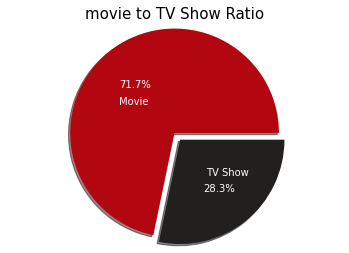

In [24]:
show_type= netflix['type'].value_counts()
show_type_label=list(netflix['type'].unique())
#Plot the graph
plt.axis('equal') 
plt.pie(show_type, labels =show_type_label, radius= 1.2, autopct= '%.1f%%',shadow=True,
        explode= [0, 0.1], colors= ['#b20710', '#221f1f'], 
        textprops= {'color':'white'}, labeldistance= 0.4)
plt.title('Movie to TV Show Ratio', fontdict= {'fontsize':15, 'fontweight': 5})
plt.show()

In [25]:
top_country= netflix.groupby(['updated_country']).show_id.count().sort_values(ascending = False).head(15)
top_country

updated_country
United States     2846
India             1026
United Kingdom     423
Japan              253
South Korea        200
Canada             183
Spain              148
France             125
Egypt              113
Mexico             111
Turkey             106
Nigeria            105
Australia           87
Taiwan              82
Brazil              81
Name: show_id, dtype: int64

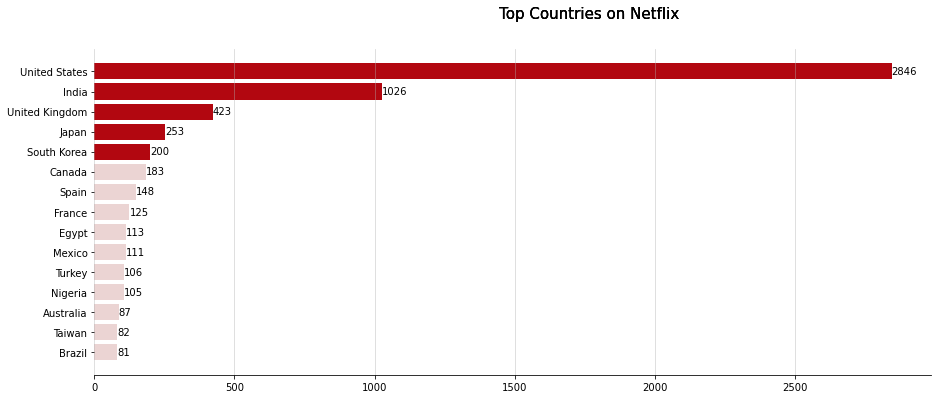

In [26]:
#plot the graph
color_netflix = ['#ebd4d3' for _ in range(len(top_country))]

color_netflix[0]= '#b20710'
color_netflix[1]= '#b20710'
color_netflix[2]= '#b20710'
color_netflix[3]= '#b20710'
color_netflix[4]= '#b20710'

fig, ax= plt.subplots(1, 1, figsize= (15,6))
ax.barh(top_country.index, top_country.values, color = color_netflix, label=top_country.values)
ax.invert_yaxis()
for i in ['top', 'left','right']:
    ax.spines[i].set_visible(False)
    fig.text(0.5, 0.95, 'Top Countries on Netflix', fontdict={'fontsize':15})
ax.grid(axis='x', linestyle= '-', alpha=0.5)
ax.bar_label(ax.barh(top_country.index, top_country.values, color= color_netflix, label=top_country.values))
plt.show()

In [27]:
top_country_movie_type= netflix[['type', 'updated_country']].groupby('updated_country').type.value_counts().unstack().loc[top_country.index]
top_country_movie_type['sum']= top_country_movie_type.sum(axis= 1)
top_country_movie_type

type,Movie,TV Show,sum
updated_country,,,
United States,2082.0,764.0,2846.0
India,947.0,79.0,1026.0
United Kingdom,209.0,214.0,423.0
Japan,84.0,169.0,253.0
South Korea,42.0,158.0,200.0
Canada,124.0,59.0,183.0
Spain,99.0,49.0,148.0
France,75.0,50.0,125.0
Egypt,99.0,14.0,113.0


In [28]:
top_country_movie_ratio= top_country_movie_type.copy()
top_country_movie_ratio['Movie']=round(((top_country_movie_ratio['Movie']/top_country_movie_ratio['sum'])*100),1)
top_country_movie_ratio['TV Show']= round(((top_country_movie_ratio['TV Show']/top_country_movie_ratio['sum'])*100),1)
top_country_movie_ratio

type,Movie,TV Show,sum
updated_country,,,
United States,73.2,26.8,2846.0
India,92.3,7.7,1026.0
United Kingdom,49.4,50.6,423.0
Japan,33.2,66.8,253.0
South Korea,21.0,79.0,200.0
Canada,67.8,32.2,183.0
Spain,66.9,33.1,148.0
France,60.0,40.0,125.0
Egypt,87.6,12.4,113.0


ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

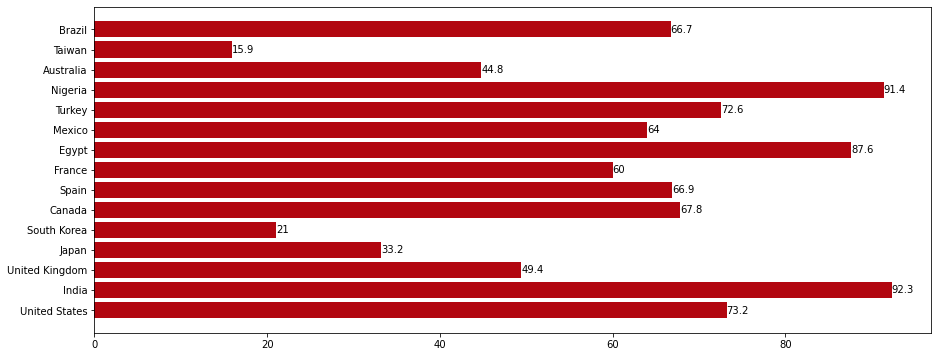

In [29]:
#lets plot the graph
fig, ax= plt.subplots(1, 1, figsize= (15, 6))
ax.bar_label(ax.barh(top_country_movie_ratio.index, top_country_movie_ratio['Movie'],
                    color= '#b20710', label= 'Movie'))
ax.barh(top_country_movie_ratio.index, top_country_movie_ratio['TV Show'], 
       left= top_country_movie_ratio['Movie'], color='#ed4d3', label= 'TV Show')
ax.invert_yaxis()
fig.text(0.75, 0.9, "Movie", fontweight= "bold", fontsize=12, color='#b20710')
fig.text(0.79, 0.9, "/", fontweight="bold", fontsize=14, color='black')
fig.text(0.8, 0.9, "TV Show", fontweight="bold", fontsize=12, color='#ebd4d3')
for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)
fig.text (0.12, 0.95, 'Top Countries on Netflix- Movie vs TV shows', fontdict={'fontsize':15})
ax.grid(axis= 'x', linestyle='-', alpha= 0.5)
plt.show()


In [33]:
#when netflix started and when it got popularity
#first convert the movie/tv show upload date to year

netflix['added_year'] = netflix ['date_add_convert'].dt.year
netflix['added_year'].fillna(0, inplace= True)
netflix['added_year']= netflix['added_year'].astype(int)
netflix

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in,description,date_add_convert,updated_country,country_y,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,United States,United States,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,South Africa,NaN,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,France,France,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,India,NaN,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,United States,United States,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016-03-09,"United Arab Emirates, Jordan","United Arab Emirates, Jordan",2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,United States,United States,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,United States,United States,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,United States,United States,2020


In [34]:
netflix_year_compare= netflix.copy()
netflix_year_compare.drop(['show_id','title', 'director', 'cast', 'country_x',
                          'date_added', 'rating', 'duration', 'listed_in', 'description', 'date_add_convert',
                          'updated_country', 'country_y'], axis= 1, inplace= True)
netflix_year_compare.drop(axis= 0, index= [6066, 6174, 6795, 6806, 6901, 7254, 7406, 7847,8182], inplace =True)
netflix_year_compare

,type,release_year,added_year
0,Movie,2020,2021
1,TV Show,2021,2021
2,TV Show,2021,2021
4,TV Show,2021,2021
5,TV Show,2021,2021
...,...,...,...
8801,Movie,2015,2016
8802,Movie,2007,2019
8804,Movie,2009,2019
8805,Movie,2006,2020


In [35]:
#Create a data field for year coloum to plot the graph
add_year = netflix_year_compare. groupby('added_year').type.value_counts()
add_year= add_year.unstack().fillna(0)
add_year

type,Movie,TV Show
added_year,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,5.0
2015,54.0,25.0
2016,244.0,166.0


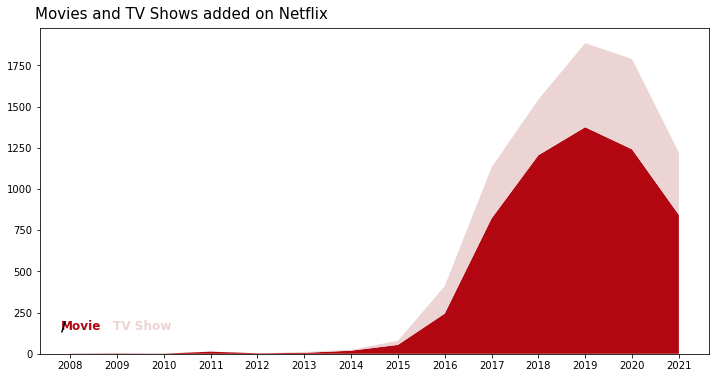

In [36]:
#Area ploy for added year 
fig, ax= plt.subplots(1, 1, figsize= (12, 6))
ax.stackplot(add_year.index, add_year['Movie'], add_year['TV Show'], colors= ['#b20710', '#ebd4d3'])
fig.text(0.12, 0.9, 'Movies and TV Shows added on Netflix', fontdict= {'fontsize':15})
fig.text(0.15, 0.18, "Movie", fontweight= "bold", fontsize=12, color='#b20710')
fig.text(0.15, 0.18, "/", fontweight= "bold", fontsize= 14, color= 'black')
fig.text(0.21, 0.18, "TV Show", fontweight= "bold", fontsize= 12, color= '#ebd4d3')
plt.xticks(np.arange(2008, 2022, 1))
plt.show()